In [1]:
%reset -f


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

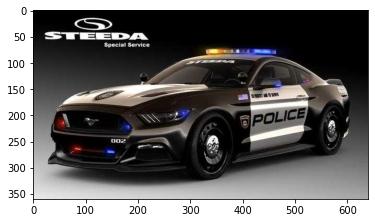

In [3]:
Data_dir = "C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train"

categories = ["Police", "Normal"]
 
for category in categories:
    path = os.path.join(Data_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.COLOR_BGR2RGB)
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        break
    break
    

In [4]:
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.COLOR_BGR2RGB)

    
    # Opening operation
    kernel = np.ones((5, 5), np.uint8)
    opening_img = cv2.morphologyEx(img_array, cv2.MORPH_OPEN, kernel)
    
    # Closing operation
    closing_img = cv2.morphologyEx(opening_img, cv2.MORPH_CLOSE, kernel)
    
    # Add noise
    noise = np.random.normal(0, 25, img_array.shape)
    noisy_img = img_array + noise.astype(np.uint8)
    
    # Resize the image
    resized_img = cv2.resize(noisy_img, (img_size, img_size))
    
    # Add an extra dimension for the batch
    resized_img = np.array(resized_img).reshape(-1, img_size, img_size, 3)
    
    return resized_img

In [5]:
training_data = []
img_size=224
def create_train_data():
    for category in categories:
        path = os.path.join(Data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_path = os.path.join(path, img)
                processed_image = prepare(img_path)
                training_data.append([processed_image, class_num])
            except Exception as e:
                pass

create_train_data()

In [6]:
import random

random.shuffle(training_data)

In [7]:
X = []
y = []

In [8]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [9]:
y = np.array(y)
X_resized = []
for image in X:
    resized_image = cv2.resize(image, (224, 224))
    X_resized.append(resized_image)

X = np.array(X_resized)

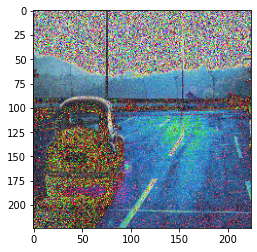

In [10]:
plt.imshow(X[3], cmap = "gray")

In [11]:
X[3].shape

(224, 224, 3)

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [13]:
X1=[]
for i in X:
    i=i/255.0
    X1.append(i)
    
X1 = np.array(X1)

In [20]:


model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(
            loss="binary_crossentropy",
            optimizer=Adam(learning_rate=0.0001),
            metrics=["accuracy"])


In [ ]:
#model.fit(X, y, batch_size = 32, validation_split=0.1, epochs=10)

In [22]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X1, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [23]:
import time

start_time = time.time()

print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

history = model.fit(X_train, y_train, batch_size=32, validation_data=(X_val, y_val), epochs=10)


test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

end_time = time.time()

elapsed_time = end_time - start_time

print(f"Execution time: {elapsed_time} seconds")

Train set: (1519, 224, 224, 3) (1519,)
Validation set: (190, 224, 224, 3) (190,)
Test set: (190, 224, 224, 3) (190,)
Epoch 1/10
48/48 [==============================] - 81s 2s/step - loss: 0.5685 - accuracy: 0.7202 - val_loss: 0.3489 - val_accuracy: 0.8789
Epoch 2/10
48/48 [==============================] - 76s 2s/step - loss: 0.3982 - accuracy: 0.8361 - val_loss: 0.2974 - val_accuracy: 0.8842
Epoch 3/10
48/48 [==============================] - 80s 2s/step - loss: 0.3457 - accuracy: 0.8670 - val_loss: 0.2697 - val_accuracy: 0.8842
Epoch 4/10
48/48 [==============================] - 77s 2s/step - loss: 0.3319 - accuracy: 0.8697 - val_loss: 0.2648 - val_accuracy: 0.9105
Epoch 5/10
48/48 [==============================] - 76s 2s/step - loss: 0.3212 - accuracy: 0.8644 - val_loss: 0.2459 - val_accuracy: 0.8895
Epoch 6/10
48/48 [==============================] - 76s 2s/step - loss: 0.2780 - accuracy: 0.8953 - val_loss: 0.2334 - val_accuracy: 0.9000
Epoch 7/10
48/48 [=========================

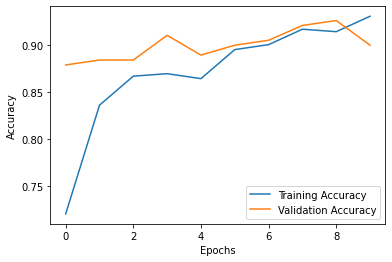

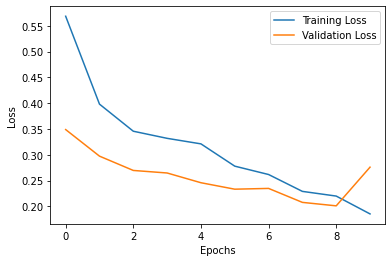

6/6 [==============================] - 2s 382ms/step - loss: 0.2847 - accuracy: 0.8842
Test Accuracy: 88.42%


In [24]:
# Plotting accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


In [25]:
model.save('police_car_detection_gray_maths.h5')

C:\Users\ragha\Anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.COLOR_BGR2RGB)
    
    # Grayscale conversion
    #gray_img = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)
    
    # Opening operation
    kernel = np.ones((5, 5), np.uint8)
    opening_img = cv2.morphologyEx(img_array, cv2.MORPH_OPEN, kernel)
    
    # Closing operation
    closing_img = cv2.morphologyEx(opening_img, cv2.MORPH_CLOSE, kernel)
    
    # Add noise
    noise = np.random.normal(0, 25, img_array.shape)
    noisy_img = img_array + noise.astype(np.uint8)
    
    # Resize the image
    resized_img = cv2.resize(noisy_img, (img_size, img_size))
    
    # Add an extra dimension for the batch
    resized_img = np.array(resized_img).reshape(-1, img_size, img_size, 3)
    
    return resized_img

In [27]:
model = tf.keras.models.load_model('police_car_detection_gray_maths.h5')

In [28]:
prediction = model.predict([prepare("test.jpg")])
print(categories[int(prediction[0][0])])

1/1 [==============================] - 0s 109ms/step
Police


In [29]:
prediction = model.predict([prepare("test1.jpg")])
print(categories[int(prediction[0][0])])

1/1 [==============================] - 0s 42ms/step
Police


In [30]:
prediction = model.predict([prepare("test2.jpg")])
print(categories[int(prediction[0][0])])

1/1 [==============================] - 0s 33ms/step
Police


In [31]:
prediction = model.predict([prepare("test3.jpg")])
print(categories[int(prediction[0][0])])

1/1 [==============================] - 0s 32ms/step
Normal


In [32]:
prediction = model.predict([prepare("test4.jpg")])
print(categories[int(prediction[0][0])])

1/1 [==============================] - 0s 30ms/step
Police


In [33]:
prediction = model.predict([prepare("test5.jpg")])
print(categories[int(prediction[0][0])])

1/1 [==============================] - 0s 30ms/step
Police
